In [1]:
import numpy as np
from ase.io import read
from ase import Atoms
from ase.spacegroup.symmetrize import FixSymmetry
from calorine.calculators import CPUNEP
from calorine.tools import get_force_constants, relax_structure
from pandas import DataFrame
from phonopy.units import THzToCm
from seekpath import get_explicit_k_path
import phonopy
from matplotlib import pyplot as plt
from ase.constraints import UnitCellFilter
from ase.optimize import BFGS
import mplpub
mplpub.setup(template='acs')

In [2]:
def get_structure(phonon):
    structure_ph = phonon.primitive
    structure_ase = Atoms(symbols=structure_ph.symbols, cell=structure_ph.cell,
                          scaled_positions=structure_ph.scaled_positions, pbc=True)
    return structure_ase

# I4/mcm DFT

In [3]:
path = "GXMGZRA"
special_points = dict(
    G = [0,0,0],
    A = [1/2, 1/2, 1/2],
    M = [1/2, 1/2, 0],
    R = [0, 1/2, 1/2],
    X = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

In [4]:
phonon = phonopy.load('DFT_BaZrS3_tilt_140.yaml')
structure = get_structure(phonon)
structure_tuple = (structure.cell[:], structure.get_scaled_positions(), structure.numbers)
phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

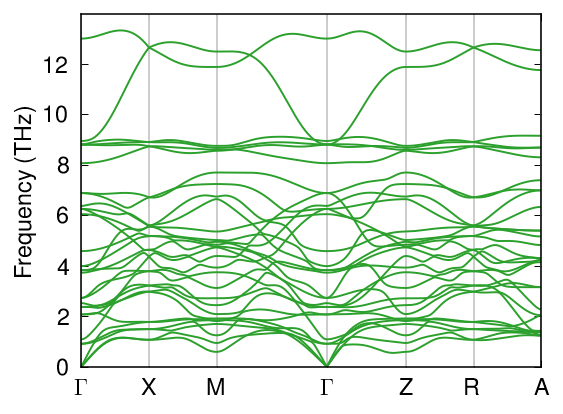

In [9]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=12)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:green')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)

fig.tight_layout()
fig.savefig('HSE_DFT_I4_mcm_phonons.png')

# Pnma DFT

In [10]:
path = "GXSYGZU"
special_points = dict(
    G = [0,0,0],
    R = [1/2, 1/2, 1/2],
    S = [1/2, 1/2, 0],
    T = [0, 1/2, 1/2],
    U = [1/2, 0, 1/2],
    X = [1/2, 0, 0],
    Y = [0, 1/2, 0],
    Z = [0 ,0, 1/2]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

In [11]:
phonon = phonopy.load('DFT_BaZrS3_tilt_62.yaml')
structure = get_structure(phonon)
structure_tuple = (structure.cell[:], structure.get_scaled_positions(), structure.numbers)
phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

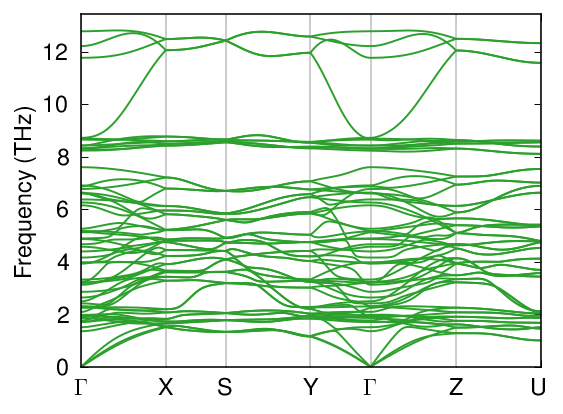

In [12]:
fig, ax = plt.subplots(figsize=(4.2, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=12)

xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:green')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)

fig.tight_layout()
fig.savefig('HSE_DFT_Pnma_phonons.png')

# Pm-3m DFT

In [17]:
path = "GXMGRM"
special_points = dict(
    G = [0,0,0],
    M = [1/2, 1/2, 0],
    R = [1/2, 1/2, 1/2],
    X = [0, 1/2, 0]
)
path_list = []
for start, stop in zip(path[:-1], path[1:]):
    start = special_points[start]
    stop = special_points[stop]
    path_list.append(np.linspace(start, stop, 100))

In [18]:
phonon = phonopy.load('DFT_BaZrS3_tilt_221.yaml')
structure = get_structure(phonon)
structure_tuple = (structure.cell[:], structure.get_scaled_positions(), structure.numbers)
phonon.run_band_structure(path_list)
band = phonon.get_band_structure_dict()
phonopy_paths, phonopy_dists, phonopy_freqs, *_ = phonon.get_band_structure()

/var/folders/z6/b_jzphk53190vbrxr2tb1l980000gn/T/ipykernel_14401/4006995689.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([0,-2.5, 0, 2.5, 5, 7.5, 10, 12.5])


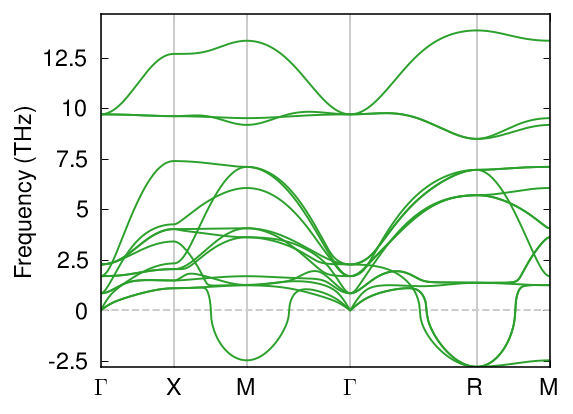

In [35]:
fig, ax = plt.subplots(figsize=(4.1, 3), dpi=140)
ax.set_ylabel('Frequency (THz)', fontsize=12)
xticks = [d[0] for d in phonopy_dists] + [phonopy_dists[-1][-1]]
labels = [r'$\UG{\Gamma}$' if m == 'G' else m for m in list(path)]
ax.set_xticks(xticks)
ax.set_xticklabels(labels)
ax.set_yticklabels([0,-2.5, 0, 2.5, 5, 7.5, 10, 12.5])
ax.axhline(0, linestyle = '--', color = '0.8')
for xp in xticks:
    ax.axvline(xp, color='0.8')

ax.plot(np.hstack(phonopy_dists), np.vstack(phonopy_freqs), color='tab:green')
ax.set_xlim(np.hstack(phonopy_dists).min(),np.hstack(phonopy_dists).max())
ax.set_ylim(np.vstack(phonopy_freqs).min())
ax.tick_params(labelsize=12)

fig.tight_layout()
fig.savefig('HSE_DFT_Pm3m_phonons.png')